C:\Users\18052\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Index(['Post ID', 'Sound Bite Text', 'Ratings and Scores', 'Title',
       'Source Type', 'Post Type', 'Is Paid', 'Media Type', 'URL',
       'Media Link', 'Domain', 'Sentiment',
       'Published Date (GMT-05:00) New York', 'Author Gender', 'Author URL',
       'Author Name', 'Author Handle', 'Author ID',
       'Author Location - Country 1', 'Author Location - State/Province 1',
       'Author Location - City 1', 'Author Location - Country 2',
       'Author Location - State/Province 2', 'Author Location - City 2',
       'Author Location - Other', 'Author Reddit Karma',
       'Followers/Daily Unique Visitors/Subscribers', 'Professions',
       'Interests', 'Positive Objects', 'Negative Objects', 'Richness', 'Tags',
       'Quoted Post', 'Quoted Author Name', 'Quoted Author Handle',
       'Total Engagements', 'Post Comments', 'Post Likes', 'Post Shares',
       'Post Views', 'Reddit Score', 'Product Name', 'Product Hierarchy',
       'Rating', '@Mention Media Tags', 'Source Name',


<AxesSubplot:>

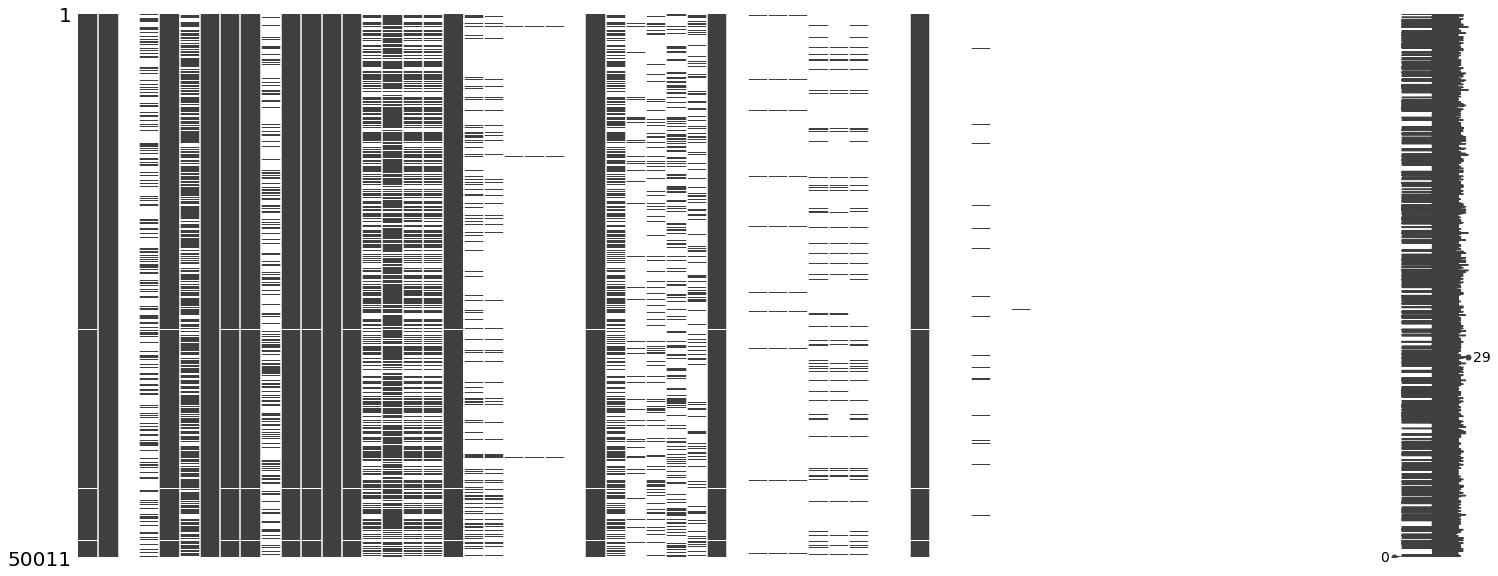

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, iqr

# Load data from Excel file
my_data = pd.read_excel("C:/Users/18052/Documents/Grad/Classes/Spring2024/ph/project/project/Diabetes_No_Reddit_50K_rows.xlsx")

# Display column names
print(my_data.columns)

# Visualize missing data by variables
import missingno as msno
msno.matrix(my_data)


    Total  Count
0      46   7792
1      41   6853
2      40   6121
3      42   5702
4      45   5688
5      39   4425
6      44   3926
7      43   3282
8      38   2409
9      47   1905
10     37    980
11     59    474
12     36    308
13     35     96
14     34     32
15     33      7
16     60      5
17     61      4
18     62      2
                   Column_Name  Missing_Count
0                      Post ID            479
1              Sound Bite Text              3
2           Ratings and Scores          50011
3                        Title          34626
4                  Source Type            485
..                         ...            ...
57  LexisNexis Subject Group 1          50011
58        LexisNexis Subject 1          50011
59  LexisNexis Subject Group 2          50011
60        LexisNexis Subject 2          50011
61   LexisNexis Other Subjects          50011

[62 rows x 2 columns]
Index(['Post_ID', 'Sound_Bite_Text', 'Ratings_and_Scores', 'Title',
       'Source_Ty

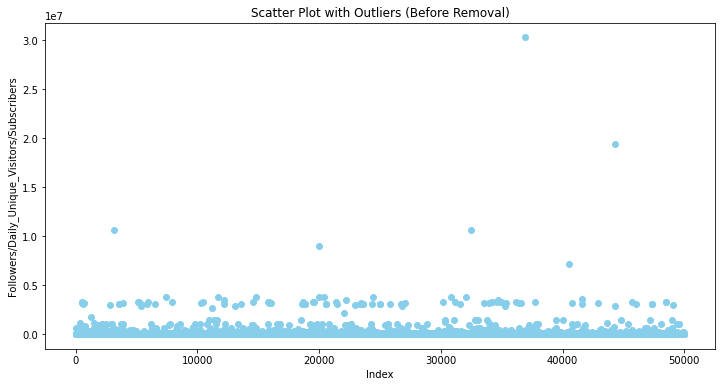

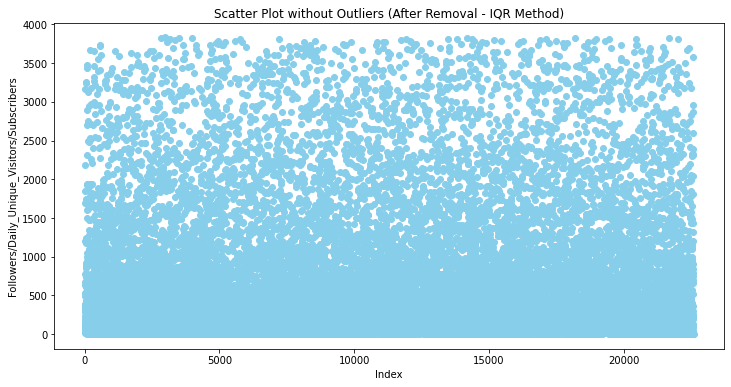

       Followers/Daily_Unique_Visitors/Subscribers
0                                              NaN
2                                              NaN
4                                              NaN
8                                              NaN
9                                           5861.0
...                                            ...
50006                                          NaN
50007                                          NaN
50008                                          NaN
50009                                          NaN
50010                                          NaN

[27379 rows x 1 columns]


In [2]:
# Count missing values per row
missing_rows = my_data.isnull().sum(axis=1)

# Create a DataFrame with column names and counts
missing_rows_df = pd.DataFrame(missing_rows.value_counts()).reset_index()
missing_rows_df.columns = ['Total', 'Count']

# Display the result
print(missing_rows_df)

# Count missing values per column
missing_counts = my_data.isnull().sum()

# Create a DataFrame with column names and counts
missing_data_info = pd.DataFrame({'Column_Name': missing_counts.index, 'Missing_Count': missing_counts.values})

# Display the result
print(missing_data_info)

# Clean column names
cleaned_col_names = my_data.columns.str.replace(' ', '_').str.replace('-', '_')
my_data.columns = cleaned_col_names

# Display the cleaned column names
print(cleaned_col_names)

# Remove row 50002
my_data.drop(50002, inplace=True)

# Check data types
print(my_data.dtypes)

# Remove 'Post_ID' column
my_data.drop('Post_ID', axis=1, inplace=True)

# Check for missing values in 'Sound_Bite_Text'
missing_rows = my_data['Sound_Bite_Text'].isnull()

# Find the row numbers where 'Sound_Bite_Text' is missing
missing_row_numbers = missing_rows[missing_rows].index

# Print the row numbers where 'Sound_Bite_Text' is missing
print(missing_row_numbers)

# Remove outliers using z-score
z_scores = zscore(my_data['Followers/Daily_Unique_Visitors/Subscribers'])
outliers_removed_zscore = my_data[(z_scores > -3) & (z_scores < 3)]

# Remove outliers using IQR
Q1 = my_data['Followers/Daily_Unique_Visitors/Subscribers'].quantile(0.25)
Q3 = my_data['Followers/Daily_Unique_Visitors/Subscribers'].quantile(0.75)
IQR_val = Q3 - Q1
outliers_removed_iqr = my_data[(my_data['Followers/Daily_Unique_Visitors/Subscribers'] >= Q1 - 1.5 * IQR_val) & (my_data['Followers/Daily_Unique_Visitors/Subscribers'] <= Q3 + 1.5 * IQR_val)]

# Output the counts of outliers removed
print("Outliers removed (Z-score Method):", len(my_data) - len(outliers_removed_zscore))
print("Outliers removed (IQR Method):", len(my_data) - len(outliers_removed_iqr))

# Create scatter plots before and after outlier removal
plt.figure(figsize=(12, 6))
plt.scatter(range(len(my_data['Followers/Daily_Unique_Visitors/Subscribers'])), my_data['Followers/Daily_Unique_Visitors/Subscribers'], color='skyblue')
plt.title("Scatter Plot with Outliers (Before Removal)")
plt.xlabel("Index")
plt.ylabel("Followers/Daily_Unique_Visitors/Subscribers")
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(range(len(outliers_removed_iqr['Followers/Daily_Unique_Visitors/Subscribers'])), outliers_removed_iqr['Followers/Daily_Unique_Visitors/Subscribers'], color='skyblue')
plt.title("Scatter Plot without Outliers (After Removal - IQR Method)")
plt.xlabel("Index")
plt.ylabel("Followers/Daily_Unique_Visitors/Subscribers")
plt.show()

# Identify the dropped rows using the IQR method
dropped_rows_iqr = pd.concat([my_data, outliers_removed_iqr]).drop_duplicates(keep=False)

# Print the sorted table
print(dropped_rows_iqr[['Followers/Daily_Unique_Visitors/Subscribers']])


In [3]:
#Checking the number of rows:
print(outliers_removed_iqr.shape[0])

22596


In [4]:
# Print the contents of the column using the column name
print(outliers_removed_iqr['Sound_Bite_Text'])


1        @thisbttrfly @TheChiefNerd @SethMacFarlane Onl...
3        @HashCodeSalt @thesurepath1 I come from a medi...
5        RT @girlziplocked: I don't think there can be ...
6        OMG I keep seeing Ads for “generic” #Ozempic. ...
7        I have been hurt big time, but then again, I a...
                               ...                        
49990    Everytime I have hypoglycaemia it’s always so ...
49991                 I think i got diabetes for christmas
49992    @StillRadNotaFad But my vision came back and m...
49997    RT @DoctorTro: ?? Blue print for “my doctor to...
49999    @555jace @SHABOOTY my diabetes!!! ???? thanks ...
Name: Sound_Bite_Text, Length: 22596, dtype: object


In [5]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
import re

# Download NLTK resources (uncomment if not already downloaded)
# nltk.download('punkt')
# nltk.download('stopwords')

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sound_Bite_Text' is the column
text_data = outliers_removed_iqr['Sound_Bite_Text']

# Lowercasing
text_data = text_data.str.lower()

# Tokenization
text_data = text_data.apply(word_tokenize)

# Removing Punctuation
text_data = text_data.apply(lambda tokens: [word for word in tokens if word not in string.punctuation])

# Removing Stopwords
stop_words = set(stopwords.words('english'))
text_data = text_data.apply(lambda tokens: [word for word in tokens if word not in stop_words])

# Stemming (Optional)
stemmer = PorterStemmer()
text_data = text_data.apply(lambda tokens: [stemmer.stem(word) for word in tokens])

# Combine tokens back to sentences (if needed)
text_data = text_data.apply(' '.join)

#remove alphanumeric
text_data = text_data.apply(lambda text: re.sub(r'[^a-zA-Z0-9\s]', '', text))


# Replace the 'Sound_Bite_Text' column with the cleaned text
outliers_removed_iqr.loc[:, 'Sound_Bite_Text'] = text_data



C:\Users\18052\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [6]:
print(outliers_removed_iqr['Sound_Bite_Text'])


1        thisbttrfli thechiefnerd sethmacfarlan peopl k...
3        hashcodesalt thesurepath1 come medic backgroun...
5        rt girlziplock nt think futur without univers ...
6        omg keep see ad  gener  ozemp gener peopl file...
7        hurt big time retire spend 800 month thank bid...
                               ...                        
49990    everytim hypoglycaemia  alway violent chill pl...
49991                            think got diabet christma
49992    stillradnotafad vision came back blood sugar 9...
49997    rt doctortro blue print  doctor told go statin...
49999    555jace shabooti diabet thank auto correct dau...
Name: Sound_Bite_Text, Length: 22596, dtype: object


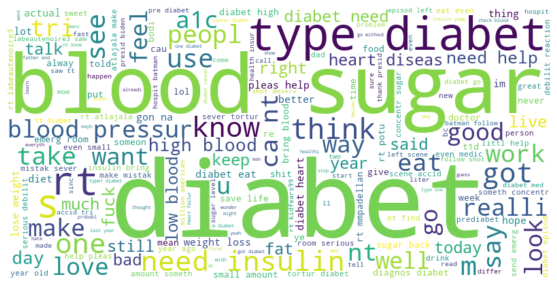

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Convert numerical data to strings and concatenate
text_data = outliers_removed_iqr["Sound_Bite_Text"].astype(str).str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



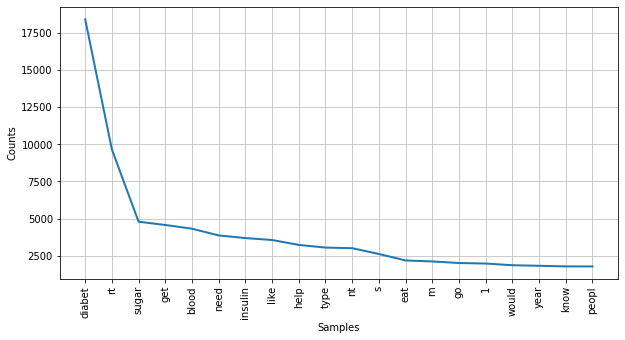

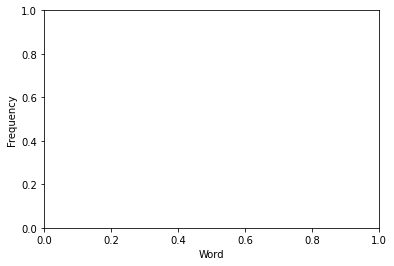

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sound_Bite_Text' is the column
text_data = outliers_removed_iqr['Sound_Bite_Text']

# Combine all text into a single string
text = ' '.join(text_data)

# Tokenize the text
tokens = word_tokenize(text)

# Remove punctuation
table = str.maketrans('', '', string.punctuation)
stripped = [word.translate(table) for word in tokens]

# Create a frequency distribution of words
freq_dist = FreqDist(stripped)

# Plot the top 20 most common words
plt.figure(figsize=(10, 5))
freq_dist.plot(20, cumulative=False)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()



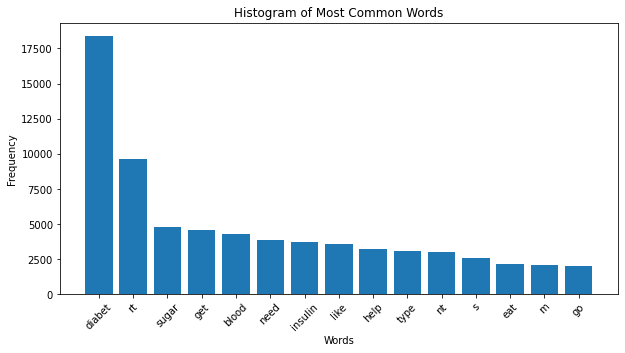

[('diabet', 18412), ('rt', 9656), ('sugar', 4793), ('get', 4573), ('blood', 4324), ('need', 3870), ('insulin', 3693), ('like', 3562), ('help', 3233), ('type', 3053), ('nt', 3013), ('s', 2622), ('eat', 2186), ('m', 2119), ('go', 2015)]


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sound_Bite_Text' is the column
text_data = outliers_removed_iqr['Sound_Bite_Text']

# Combine all text into a single string
text = ' '.join(text_data)

# Tokenize the text
tokens = word_tokenize(text)

# Remove punctuation
table = str.maketrans('', '', string.punctuation)
stripped = [word.translate(table) for word in tokens]

# Create a frequency distribution of words
freq_dist = FreqDist(stripped)

# Get the most common words and their frequencies
top_words = freq_dist.most_common(15)  # Change 10 to the desired number of top words

# Extract words and frequencies
words, frequencies = zip(*top_words)

# Plot histogram
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Histogram of Most Common Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
print(top_words)

In [10]:
# Check if the 'Sound_Bite_Text' column contains '@'
contains_at = outliers_removed_iqr['Sound_Bite_Text'].str.contains('@').any()

if contains_at:
    print("The column contains '@'.")
else:
    print("The column does not contain '@'.")


The column does not contain '@'.


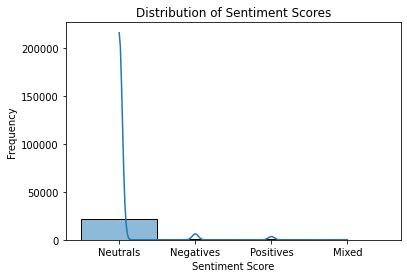

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have sentiment scores stored in a column named 'Sentiment_Score'
sns.histplot(outliers_removed_iqr['Sentiment'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


In [12]:
# Assuming you have sentiment scores stored in a column named 'Sentiment_Score'
sentiment_counts = outliers_removed_iqr['Sentiment'].value_counts()

print(sentiment_counts)


Neutrals     21629
Negatives      617
Positives      339
Mixed           11
Name: Sentiment, dtype: int64


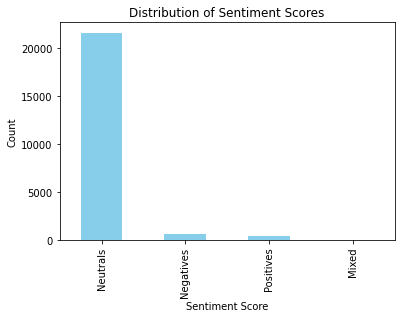

In [13]:
import matplotlib.pyplot as plt

# Assuming sentiment_counts contains the count of each sentiment score
sentiment_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Count')

plt.show()


C:\Users\18052\AppData\Local\Temp/ipykernel_484/2911281397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'] = pd.to_datetime(outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'])


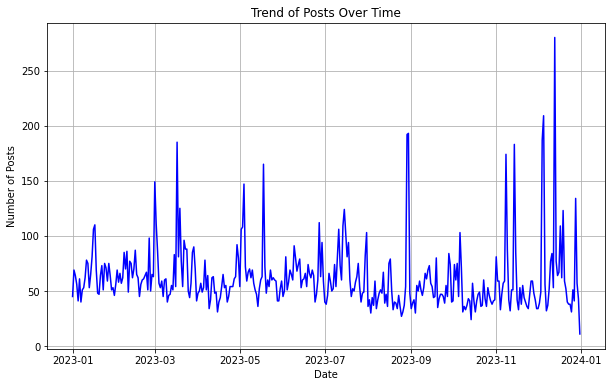

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'outliers_removed_iqr' is your DataFrame
# Convert 'Published_Date_(GMT-05:00)_New_York' column to datetime format
outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'] = pd.to_datetime(outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'])

# Group data by date and count the number of posts for each date
post_counts = outliers_removed_iqr.groupby(outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'].dt.date).size()

# Plot the trend of posts
plt.figure(figsize=(10, 6))
post_counts.plot(kind='line', color='blue')
plt.title('Trend of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()


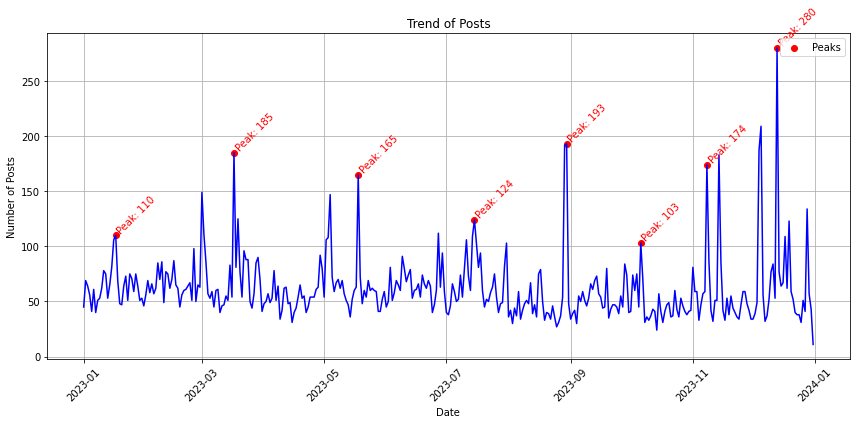

In [15]:
from scipy.signal import find_peaks

# Find peaks in the post counts
peaks, _ = find_peaks(post_counts, distance=30)  # Adjust distance parameter as needed

# Plot the trend of posts
plt.figure(figsize=(12, 6))  # Adjust the figsize as needed
plt.plot(post_counts.index, post_counts.values, color='blue')
plt.scatter(post_counts.index[peaks], post_counts.values[peaks], color='red', marker='o', label='Peaks')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Trend of Posts')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Label the highest peaks
for peak_date, peak_count in zip(post_counts.index[peaks], post_counts.values[peaks]):
    plt.text(peak_date, peak_count, f'Peak: {peak_count}', ha='left', va='bottom', rotation=45, color='red')

plt.tight_layout()  # Adjust layout
plt.show()



In [16]:
#I want to do wordcloud but having only the words colored as positives or negatives.

In [17]:
import pandas as pd
from collections import Counter

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sound_Bite_Text' and 'Sentiment' are the columns
# Combine all text into a single string
text = ' '.join(outliers_removed_iqr['Sound_Bite_Text'])

# Tokenize the text
words = text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Filter the DataFrame by sentiment
positive_words = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Positive']['Sound_Bite_Text'].str.split(expand=True).stack()
negative_words = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Negative']['Sound_Bite_Text'].str.split(expand=True).stack()
neutral_words = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Neutral']['Sound_Bite_Text'].str.split(expand=True).stack()

# Count the occurrences of each word by sentiment
positive_word_counts = positive_words.value_counts()
negative_word_counts = negative_words.value_counts()
neutral_word_counts = neutral_words.value_counts()

# Display the top 10 words and their counts
print("Top 10 Words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Display the counts of positive, negative, and neutral words
print("\nPositive Word Counts:")
print(positive_word_counts)

print("\nNegative Word Counts:")
print(negative_word_counts)

print("\nNeutral Word Counts:")
print(neutral_word_counts)


Top 10 Words:
diabet: 18412
rt: 9656
sugar: 4793
get: 4573
blood: 4324
need: 3870
insulin: 3693
like: 3562
help: 3233
type: 3053

Positive Word Counts:
Series([], dtype: int64)

Negative Word Counts:
Series([], dtype: int64)

Neutral Word Counts:
Series([], dtype: int64)


In [18]:
import pandas as pd
from collections import Counter

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sound_Bite_Text' and 'Sentiment' are the columns
# Combine all text into a single string
text = ' '.join(outliers_removed_iqr['Sound_Bite_Text'])

# Tokenize the text
words = text.split()

# Count the occurrences of each word
word_counts = Counter(words)

# Get the top 10 most common words
top_10_words = word_counts.most_common(10)

# Display the top 10 words and their counts along with sentiments
print("Top 10 Words:")
for word, count in top_10_words:
    # Get the sentiment for the word
    sentiment = outliers_removed_iqr[outliers_removed_iqr['Sound_Bite_Text'].str.contains(word)]['Sentiment'].mode()
    if not sentiment.empty:
        sentiment = sentiment.iloc[0]
    else:
        sentiment = "Unknown"
    print(f"{word}: {count} ({sentiment})")


Top 10 Words:
diabet: 18412 (Neutrals)
rt: 9656 (Neutrals)
sugar: 4793 (Neutrals)
get: 4573 (Neutrals)
blood: 4324 (Neutrals)
need: 3870 (Neutrals)
insulin: 3693 (Neutrals)
like: 3562 (Neutrals)
help: 3233 (Neutrals)
type: 3053 (Neutrals)


In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame for positive and negative sentiments
positive_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Positive']['Sound_Bite_Text']
negative_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Negative']['Sound_Bite_Text']

# Combine all positive and negative texts into single strings
positive_text = ' '.join(positive_texts)
negative_text = ' '.join(negative_texts)

# Generate word clouds for positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='red').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='green').generate(negative_text)

# Display the word clouds using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')

plt.show()




ValueError: We need at least 1 word to plot a word cloud, got 0.

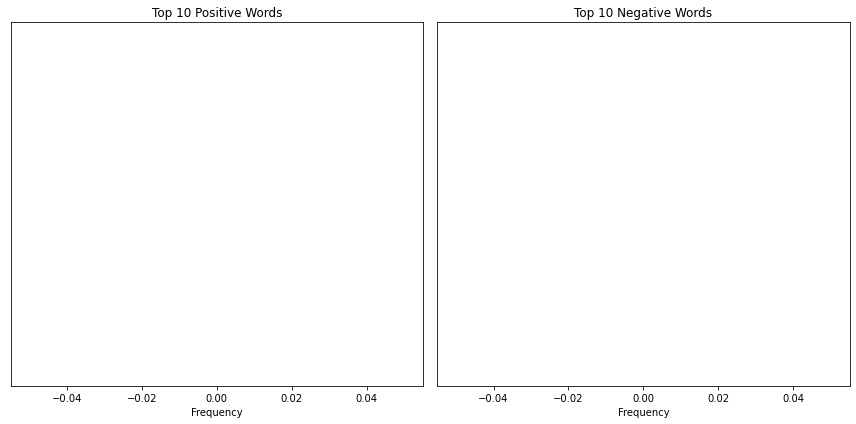

In [20]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sentiment' and 'Sound_Bite_Text' are the columns

# Filter the DataFrame for positive and negative sentiments
positive_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Positive']['Sound_Bite_Text']
negative_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Negative']['Sound_Bite_Text']

# Combine all positive and negative texts into single strings
positive_text = ' '.join(positive_texts)
negative_text = ' '.join(negative_texts)

# Tokenize the text and count the occurrences of each word
positive_words = positive_text.split()
negative_words = negative_text.split()
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the top 10 most common words for each sentiment
top_10_positive_words = positive_word_counts.most_common(10)
top_10_negative_words = negative_word_counts.most_common(10)

# Plot the top 10 most frequent words for each sentiment
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(range(len(top_10_positive_words)), [count for word, count in top_10_positive_words], color='green')
plt.yticks(range(len(top_10_positive_words)), [word for word, count in top_10_positive_words])
plt.xlabel('Frequency')
plt.title('Top 10 Positive Words')

plt.subplot(1, 2, 2)
plt.barh(range(len(top_10_negative_words)), [count for word, count in top_10_negative_words], color='red')
plt.yticks(range(len(top_10_negative_words)), [word for word, count in top_10_negative_words])
plt.xlabel('Frequency')
plt.title('Top 10 Negative Words')

plt.tight_layout()
plt.show()


Positive Text:
rt informednjnurs repeat type 2 diabet revers proper diet exercis excus type 2 diabet find doctor fo
Negative Text:
check guid beat diabet natur tire skyrocket blood sugar medic make feel like poop click link get gui
Positive Word Counts:
[('diabet', 285), ('rt', 126), ('help', 121), ('sugar', 104), ('blood', 90), ('get', 81), ('insulin', 55), ('type', 47), ('need', 39), ('2', 38)]
Negative Word Counts:
[('diabet', 586), ('rt', 259), ('sugar', 215), ('get', 172), ('blood', 170), ('friend', 135), ('type', 103), ('time', 101), ('start', 97), ('nt', 93)]


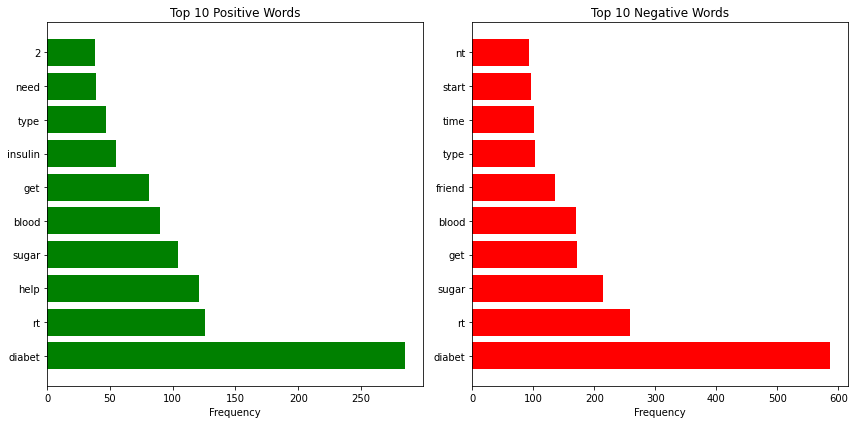

In [21]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sentiment' and 'Sound_Bite_Text' are the columns

# Filter the DataFrame for positive and negative sentiments
positive_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Positives']['Sound_Bite_Text']
negative_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Negatives']['Sound_Bite_Text']

# Combine all positive and negative texts into single strings
positive_text = ' '.join(positive_texts)
negative_text = ' '.join(negative_texts)

print("Positive Text:")
print(positive_text[:100])  # Print the first 100 characters of positive text
print("Negative Text:")
print(negative_text[:100])  # Print the first 100 characters of negative text

# Tokenize the text and count the occurrences of each word
positive_words = positive_text.split()
negative_words = negative_text.split()
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

print("Positive Word Counts:")
print(positive_word_counts.most_common(10))  # Print the top 10 positive word counts
print("Negative Word Counts:")
print(negative_word_counts.most_common(10))  # Print the top 10 negative word counts

# Get the top 10 most common words for each sentiment
top_10_positive_words = positive_word_counts.most_common(10)
top_10_negative_words = negative_word_counts.most_common(10)

# Plot the top 10 most frequent words for each sentiment
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(range(len(top_10_positive_words)), [count for word, count in top_10_positive_words], color='green')
plt.yticks(range(len(top_10_positive_words)), [word for word, count in top_10_positive_words])
plt.xlabel('Frequency')
plt.title('Top 10 Positive Words')

plt.subplot(1, 2, 2)
plt.barh(range(len(top_10_negative_words)), [count for word, count in top_10_negative_words], color='red')
plt.yticks(range(len(top_10_negative_words)), [word for word, count in top_10_negative_words])
plt.xlabel('Frequency')
plt.title('Top 10 Negative Words')

plt.tight_layout()
plt.show()


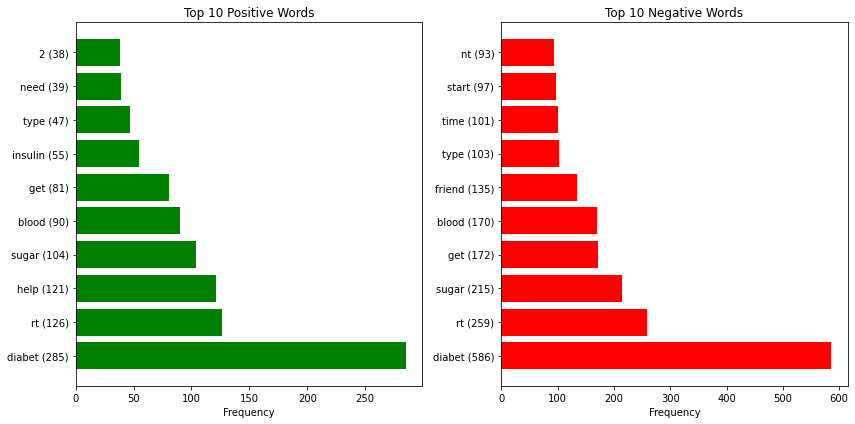

In [30]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sentiment' and 'Sound_Bite_Text' are the columns

# Filter the DataFrame for positive and negative sentiments
positive_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Positives']['Sound_Bite_Text']
negative_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Negatives']['Sound_Bite_Text']

# Combine all positive and negative texts into single strings
positive_text = ' '.join(positive_texts)
negative_text = ' '.join(negative_texts)

# Tokenize the text and count the occurrences of each word
positive_words = positive_text.split()
negative_words = negative_text.split()
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the top 10 most common words for each sentiment
top_10_positive_words = positive_word_counts.most_common(10)
top_10_negative_words = negative_word_counts.most_common(10)

# Plot the top 10 most frequent words for each sentiment with frequencies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(range(len(top_10_positive_words)), [count for word, count in top_10_positive_words], color='green')
plt.yticks(range(len(top_10_positive_words)), [f"{word} ({count})" for word, count in top_10_positive_words])
plt.xlabel('Frequency')
plt.title('Top 10 Positive Words')

plt.subplot(1, 2, 2)
plt.barh(range(len(top_10_negative_words)), [count for word, count in top_10_negative_words], color='red')
plt.yticks(range(len(top_10_negative_words)), [f"{word} ({count})" for word, count in top_10_negative_words])
plt.xlabel('Frequency')
plt.title('Top 10 Negative Words')

plt.tight_layout()
plt.show()


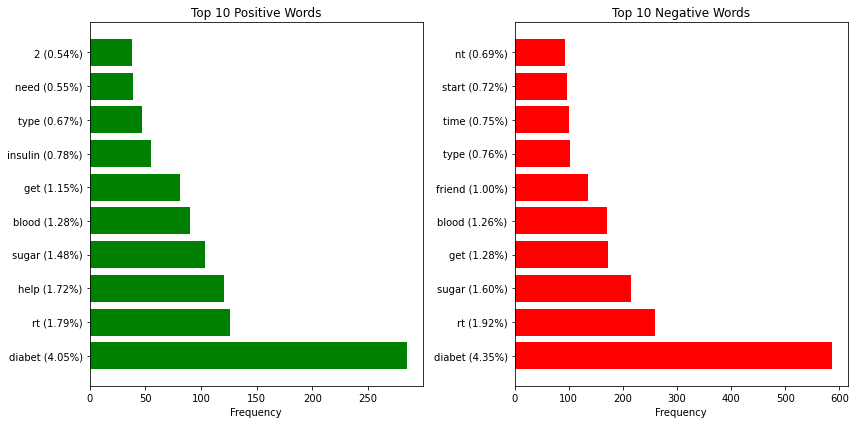

In [29]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sentiment' and 'Sound_Bite_Text' are the columns

# Filter the DataFrame for positive and negative sentiments
positive_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Positives']['Sound_Bite_Text']
negative_texts = outliers_removed_iqr[outliers_removed_iqr['Sentiment'] == 'Negatives']['Sound_Bite_Text']

# Combine all positive and negative texts into single strings
positive_text = ' '.join(positive_texts)
negative_text = ' '.join(negative_texts)

# Tokenize the text and count the occurrences of each word
positive_words = positive_text.split()
negative_words = negative_text.split()
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the total number of words for each sentiment category
total_positive_words = len(positive_words)
total_negative_words = len(negative_words)

# Calculate the percentage of each word occurrence relative to the total number of words
positive_word_percentages = {word: count / total_positive_words * 100 for word, count in positive_word_counts.items()}
negative_word_percentages = {word: count / total_negative_words * 100 for word, count in negative_word_counts.items()}

# Get the top 10 most common words for each sentiment
top_10_positive_words = positive_word_counts.most_common(10)
top_10_negative_words = negative_word_counts.most_common(10)

# Plot the top 10 most frequent words for each sentiment with percentages
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(range(len(top_10_positive_words)), [count for word, count in top_10_positive_words], color='green')
plt.yticks(range(len(top_10_positive_words)), [f"{word} ({positive_word_percentages[word]:.2f}%)" for word, count in top_10_positive_words])
plt.xlabel('Frequency')
plt.title('Top 10 Positive Words')

plt.subplot(1, 2, 2)
plt.barh(range(len(top_10_negative_words)), [count for word, count in top_10_negative_words], color='red')
plt.yticks(range(len(top_10_negative_words)), [f"{word} ({negative_word_percentages[word]:.2f}%)" for word, count in top_10_negative_words])
plt.xlabel('Frequency')
plt.title('Top 10 Negative Words')

plt.tight_layout()
plt.show()


C:\Users\18052\AppData\Local\Temp/ipykernel_484/688860610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'] = pd.to_datetime(outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'])


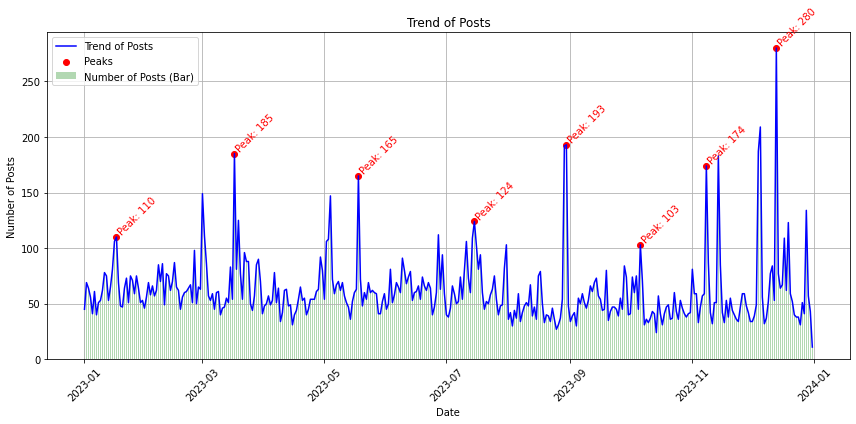

In [28]:
# Convert 'Published_Date_(GMT_05:00)_New_York' column to datetime format
outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'] = pd.to_datetime(outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'])

# Group data by date and count the number of posts for each date
post_counts = outliers_removed_iqr.groupby(outliers_removed_iqr['Published_Date_(GMT_05:00)_New_York'].dt.date).size()

# Find peaks in the post counts
peaks, _ = find_peaks(post_counts, distance=30)  # Adjust distance parameter as needed

# Plot the trend of posts with bar plot behind
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot
ax.bar(post_counts.index, post_counts.values, color='green', alpha=0.3, label='Number of Posts (Bar)')

# Line plot
ax.plot(post_counts.index, post_counts.values, color='blue', label='Trend of Posts')

# Highlight peaks
ax.scatter(post_counts.index[peaks], post_counts.values[peaks], color='red', marker='o', label='Peaks')

# Label the highest peaks
for peak_date, peak_count in zip(post_counts.index[peaks], post_counts.values[peaks]):
    ax.text(peak_date, peak_count, f'Peak: {peak_count}', ha='left', va='bottom', rotation=45, color='red')

# Adjust labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Number of Posts')
ax.set_title('Trend of Posts')
ax.legend()
ax.grid(True)
ax.xaxis.set_tick_params(rotation=45)

plt.tight_layout()
plt.show()



In [ ]:
######Abandon sentiment 
###################################Use Vador###########################################

In [34]:

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sound_Bite_Text' is the column containing text data

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to tokenize text and get sentiment scores
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply sentiment analysis to each row in the 'Sound_Bite_Text' column
outliers_removed_iqr['Sentiment_Scores'] = outliers_removed_iqr['Sound_Bite_Text'].apply(analyze_sentiment)

# Extract positive and negative words based on sentiment scores
positive_words = []
negative_words = []
for _, row in outliers_removed_iqr.iterrows():
    text = row['Sound_Bite_Text']
    scores = row['Sentiment_Scores']
    words = text.split()
    for word in words:
        # Check if the word contributes significantly to positive or negative sentiment
        if scores['pos'] > 0 and scores['compound'] >= 0:
            positive_words.append(word.lower())
        elif scores['neg'] > 0 and scores['compound'] <= 0:
            negative_words.append(word.lower())

# Count the occurrences of each word
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the top 10 most common positive and negative words
top_10_positive_words = positive_word_counts.most_common(10)
top_10_negative_words = negative_word_counts.most_common(10)

print("Top 10 Positive Words:")
print(top_10_positive_words)
print("\nTop 10 Negative Words:")
print(top_10_negative_words)



C:\Users\18052\AppData\Local\Temp/ipykernel_484/70494216.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed_iqr['Sentiment_Scores'] = outliers_removed_iqr['Sound_Bite_Text'].apply(analyze_sentiment)


Top 10 Positive Words:
[('diabet', 8300), ('rt', 4426), ('help', 2799), ('like', 2600), ('need', 2590), ('sugar', 2311), ('insulin', 2233), ('get', 2232), ('blood', 1885), ('type', 1445)]

Top 10 Negative Words:
[('diabet', 7117), ('rt', 3994), ('sugar', 1986), ('blood', 1966), ('get', 1659), ('nt', 1450), ('type', 1114), ('insulin', 1105), ('die', 1096), ('go', 1055)]


C:\Users\18052\AppData\Local\Temp/ipykernel_484/734977591.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed_iqr['Sentiment_Scores'] = outliers_removed_iqr['Sound_Bite_Text'].apply(analyze_sentiment)


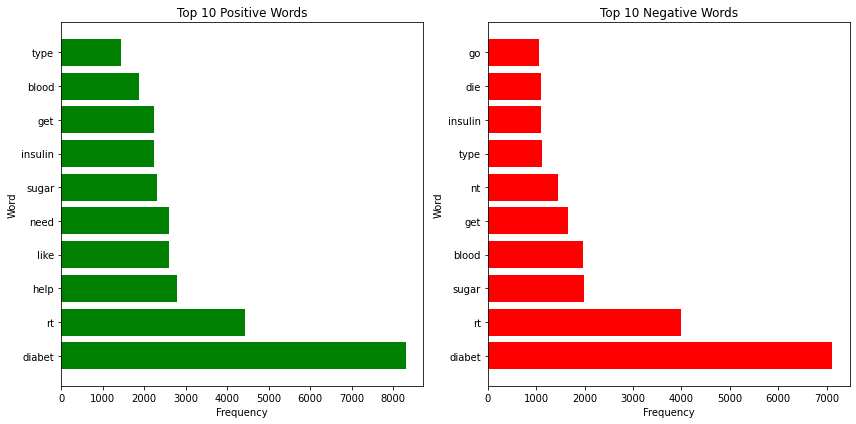

In [35]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sound_Bite_Text' is the column containing text data

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to tokenize text and get sentiment scores
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply sentiment analysis to each row in the 'Sound_Bite_Text' column
outliers_removed_iqr['Sentiment_Scores'] = outliers_removed_iqr['Sound_Bite_Text'].apply(analyze_sentiment)

# Extract positive and negative words based on sentiment scores
positive_words = []
negative_words = []
for _, row in outliers_removed_iqr.iterrows():
    text = row['Sound_Bite_Text']
    scores = row['Sentiment_Scores']
    words = text.split()
    for word in words:
        # Check if the word contributes significantly to positive or negative sentiment
        if scores['pos'] > 0 and scores['compound'] >= 0:
            positive_words.append(word.lower())
        elif scores['neg'] > 0 and scores['compound'] <= 0:
            negative_words.append(word.lower())

# Count the occurrences of each word
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the top 10 most common positive and negative words
top_10_positive_words = positive_word_counts.most_common(10)
top_10_negative_words = negative_word_counts.most_common(10)

# Extract words and counts for plotting
positive_words, positive_counts = zip(*top_10_positive_words)
negative_words, negative_counts = zip(*top_10_negative_words)

# Plot bar charts for top 10 positive and negative words
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(range(len(positive_words)), positive_counts, color='green')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 10 Positive Words')
plt.yticks(range(len(positive_words)), positive_words)

plt.subplot(1, 2, 2)
plt.barh(range(len(negative_words)), negative_counts, color='red')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 10 Negative Words')
plt.yticks(range(len(negative_words)), negative_words)

plt.tight_layout()
plt.show()


C:\Users\18052\AppData\Local\Temp/ipykernel_484/3367746776.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed_iqr['Sentiment_Scores'] = outliers_removed_iqr['Sound_Bite_Text'].apply(analyze_sentiment)


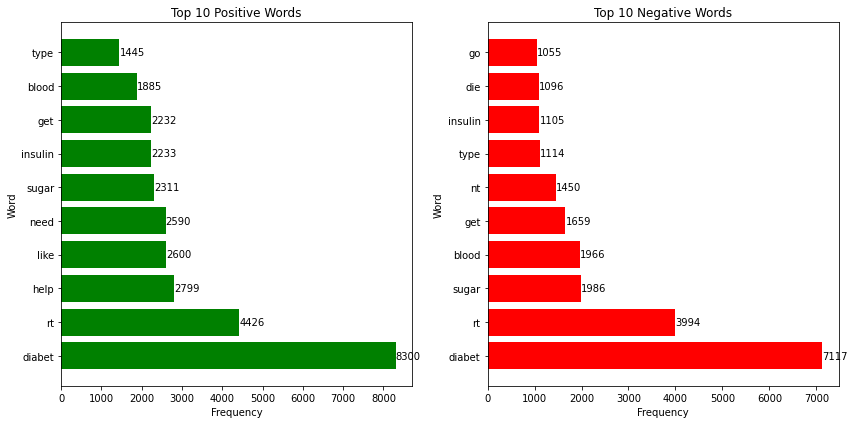

In [37]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sound_Bite_Text' is the column containing text data

# Initialize VADER
sid = SentimentIntensityAnalyzer()

# Function to tokenize text and get sentiment scores
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores

# Apply sentiment analysis to each row in the 'Sound_Bite_Text' column
outliers_removed_iqr['Sentiment_Scores'] = outliers_removed_iqr['Sound_Bite_Text'].apply(analyze_sentiment)

# Extract positive and negative words based on sentiment scores
positive_words = []
negative_words = []
for _, row in outliers_removed_iqr.iterrows():
    text = row['Sound_Bite_Text']
    scores = row['Sentiment_Scores']
    words = text.split()
    for word in words:
        # Check if the word contributes significantly to positive or negative sentiment
        if scores['pos'] > 0 and scores['compound'] >= 0:
            positive_words.append(word.lower())
        elif scores['neg'] > 0 and scores['compound'] <= 0:
            negative_words.append(word.lower())

# Count the occurrences of each word
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the top 10 most common positive and negative words
top_10_positive_words = positive_word_counts.most_common(10)
top_10_negative_words = negative_word_counts.most_common(10)

# Extract words and counts for plotting
positive_words, positive_counts = zip(*top_10_positive_words)
negative_words, negative_counts = zip(*top_10_negative_words)

# Plot bar charts for top 10 positive and negative words with annotations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(range(len(positive_words)), positive_counts, color='green')
for i, count in enumerate(positive_counts):
    plt.text(count, i, str(count), ha='left', va='center', color='black')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 10 Positive Words')
plt.yticks(range(len(positive_words)), positive_words)

plt.subplot(1, 2, 2)
plt.barh(range(len(negative_words)), negative_counts, color='red')
for i, count in enumerate(negative_counts):
    plt.text(count, i, str(count), ha='left', va='center', color='black')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Top 10 Negative Words')
plt.yticks(range(len(negative_words)), negative_words)

plt.tight_layout()
plt.show()


In [39]:
#pip install geopandas


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
bokeh 2.4.1 requires typing-extensions>=3.10.0, but you have typing-extensions 3.7.4.3 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.26.4 which is incompatible.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.4 which is incompatible.


     ---------------------------------------- 51.5/51.5 kB ? eta 0:00:00
     ---------------------------------------- 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 1.1/1.1 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 22.9/22.9 MB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 11.6/11.6 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 6.1/6.1 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 1.4/1.4 MB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 15.8/15.8 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 505.5/505.5 kB 4.0 MB/s eta 0:00:00
   ---------------------------------------- 345.4/345.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.3
    Uninstalling pytz-2018.3:
      Successfully uninstalled pytz-2018.3
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.2
  

In [52]:
print(my_data['Author_Location___State/Province_1'])
# Assuming you have already loaded your dataset into my_data DataFrame
unique_states = my_data['Author_Location___State/Province_1'].unique()
print(unique_states)


5             Illinois
6        Massachusetts
7              Florida
11            Delaware
14          California
             ...      
49979          Arizona
49981         Maryland
49985         Maryland
49989       California
49997          Florida
Name: Author_Location___State/Province_1, Length: 9107, dtype: object
['Illinois' 'Massachusetts' 'Florida' 'Delaware' 'California' 'Alabama'
 'Oklahoma' 'New York' 'Tennessee' 'District of Columbia' 'Pennsylvania'
 'Oregon' 'Virginia' 'Ohio' 'Texas' 'Maryland' 'Michigan' 'Colorado'
 'Arkansas' 'Mississippi' 'North Carolina' 'Wisconsin' 'Montana'
 'South Carolina' 'Maine' 'Arizona' 'Washington' 'Minnesota' 'Utah'
 'Louisiana' 'Connecticut' 'New Jersey' 'Idaho' 'Georgia' 'Missouri'
 'Alaska' 'North Dakota' 'Kansas' 'Hawaii' 'Kentucky' 'Indiana' 'Ontario'
 'New Mexico' 'Rhode Island' 'Nevada' 'Iowa' 'Wyoming' 'Nebraska'
 'New Hampshire' 'West Virginia' 'Attica' 'Vermont' 'South Dakota'
 'Guerrero' 'Kyiv City' 'Sing Buri']


In [54]:
# Assuming you have already loaded your dataset into my_data DataFrame
state_counts = my_data['Author_Location___State/Province_1'].value_counts().sort_index()
print(state_counts)


Alabama                  146
Alaska                    19
Arizona                  184
Arkansas                  69
Attica                     1
California              1087
Colorado                 170
Connecticut               96
Delaware                  18
District of Columbia     103
Florida                  619
Georgia                  314
Guerrero                   1
Hawaii                    18
Idaho                     39
Illinois                 324
Indiana                  121
Iowa                      50
Kansas                    49
Kentucky                 106
Kyiv City                  1
Louisiana                109
Maine                     23
Maryland                 180
Massachusetts            221
Michigan                 282
Minnesota                144
Mississippi               46
Missouri                 159
Montana                   25
Nebraska                  33
Nevada                   112
New Hampshire             29
New Jersey               183
New Mexico    

In [ ]:
#####################################Here we noticed that the the column of the states that are mentioned has outliers because it
#####################################Has states outside the usa.

In [60]:
# List of all states in the United States
all_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
    'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
    'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

# Assuming you have already loaded your dataset into my_data DataFrame
state_counts = my_data['Author_Location___State/Province_1'].value_counts().sort_index()

# Filter the state_counts Series to include only states in the list of all_states
state_counts = state_counts[state_counts.index.isin(all_states)]

# Filter the my_data DataFrame to include only rows where the state is in the all_states list
my_data = my_data[my_data['Author_Location___State/Province_1'].isin(all_states)]

print(state_counts)


Alabama            146
Alaska              19
Arizona            184
Arkansas            69
California        1087
Colorado           170
Connecticut         96
Delaware            18
Florida            619
Georgia            314
Hawaii              18
Idaho               39
Illinois           324
Indiana            121
Iowa                50
Kansas              49
Kentucky           106
Louisiana          109
Maine               23
Maryland           180
Massachusetts      221
Michigan           282
Minnesota          144
Mississippi         46
Missouri           159
Montana             25
Nebraska            33
Nevada             112
New Hampshire       29
New Jersey         183
New Mexico          37
New York           767
North Carolina     237
North Dakota        60
Ohio               482
Oklahoma            92
Oregon             157
Pennsylvania       335
Rhode Island        27
South Carolina      90
South Dakota        12
Tennessee          183
Texas              817
Utah       

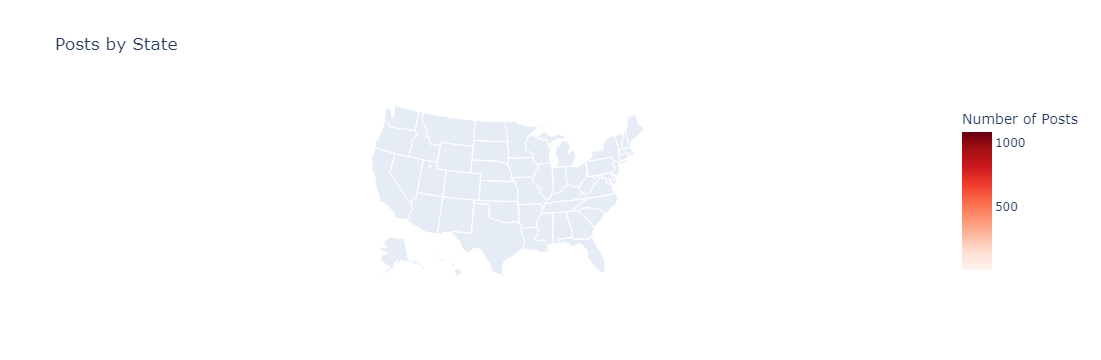

In [70]:
import plotly.graph_objects as go
import pandas as pd


# Drop rows with missing values in the 'Author_Location___State/Province_1' column from state_counts
state_counts = state_counts.dropna()

# Drop rows with missing values in the 'Author_Location___State/Province_1' column from my_data
my_data = my_data.dropna(subset=['Author_Location___State/Province_1'])

# Create text for hover information
my_data['text'] = my_data['Author_Location___State/Province_1'] + '<br>' + \
             'Number of Posts: ' + my_data.groupby('Author_Location___State/Province_1').size().astype(str)

fig = go.Figure(data=go.Choropleth(
    locations=my_data['Author_Location___State/Province_1'],
    z=my_data.groupby('Author_Location___State/Province_1').size().astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=my_data['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Number of Posts"
))

fig.update_layout(
    title_text='Posts by State',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()


In [71]:
print(my_data['text'])
print(state_counts)

5        NaN
6        NaN
7        NaN
11       NaN
14       NaN
        ... 
49979    NaN
49981    NaN
49985    NaN
49989    NaN
49997    NaN
Name: text, Length: 8996, dtype: object
Alabama            146
Alaska              19
Arizona            184
Arkansas            69
California        1087
Colorado           170
Connecticut         96
Delaware            18
Florida            619
Georgia            314
Hawaii              18
Idaho               39
Illinois           324
Indiana            121
Iowa                50
Kansas              49
Kentucky           106
Louisiana          109
Maine               23
Maryland           180
Massachusetts      221
Michigan           282
Minnesota          144
Mississippi         46
Missouri           159
Montana             25
Nebraska            33
Nevada             112
New Hampshire       29
New Jersey         183
New Mexico          37
New York           767
North Carolina     237
North Dakota        60
Ohio               482
Oklahoma    

In [74]:
print(my_data['text'])
print(state_counts)
missing_values = my_data[my_data['Author_Location___State/Province_1'].isna()]
print(missing_values)


5        NaN
6        NaN
7        NaN
11       NaN
14       NaN
        ... 
49979    NaN
49981    NaN
49985    NaN
49989    NaN
49997    NaN
Name: text, Length: 8996, dtype: object
Alabama            146
Alaska              19
Arizona            184
Arkansas            69
California        1087
Colorado           170
Connecticut         96
Delaware            18
Florida            619
Georgia            314
Hawaii              18
Idaho               39
Illinois           324
Indiana            121
Iowa                50
Kansas              49
Kentucky           106
Louisiana          109
Maine               23
Maryland           180
Massachusetts      221
Michigan           282
Minnesota          144
Mississippi         46
Missouri           159
Montana             25
Nebraska            33
Nevada             112
New Hampshire       29
New Jersey         183
New Mexico          37
New York           767
North Carolina     237
North Dakota        60
Ohio               482
Oklahoma    

In [75]:
grouped_data = my_data.groupby('Author_Location___State/Province_1').size()
print(grouped_data)


Author_Location___State/Province_1
Alabama            146
Alaska              19
Arizona            184
Arkansas            69
California        1087
Colorado           170
Connecticut         96
Delaware            18
Florida            619
Georgia            314
Hawaii              18
Idaho               39
Illinois           324
Indiana            121
Iowa                50
Kansas              49
Kentucky           106
Louisiana          109
Maine               23
Maryland           180
Massachusetts      221
Michigan           282
Minnesota          144
Mississippi         46
Missouri           159
Montana             25
Nebraska            33
Nevada             112
New Hampshire       29
New Jersey         183
New Mexico          37
New York           767
North Carolina     237
North Dakota        60
Ohio               482
Oklahoma            92
Oregon             157
Pennsylvania       335
Rhode Island        27
South Carolina      90
South Dakota        12
Tennessee          183

In [77]:
# Create text for hover information
my_data['text'] = my_data['Author_Location___State/Province_1'] + '<br>' + \
                  'Number of Posts: ' + my_data.groupby('Author_Location___State/Province_1').size().astype(str)
print(my_data['text'])

5        NaN
6        NaN
7        NaN
11       NaN
14       NaN
        ... 
49979    NaN
49981    NaN
49985    NaN
49989    NaN
49997    NaN
Name: text, Length: 8996, dtype: object


In [79]:
# Create text for hover information
text_data = my_data.groupby('Author_Location___State/Province_1').size().astype(str)
print(text_data)
nan_rows = my_data[my_data['text'].isna()]
print(nan_rows)

Author_Location___State/Province_1
Alabama            146
Alaska              19
Arizona            184
Arkansas            69
California        1087
Colorado           170
Connecticut         96
Delaware            18
Florida            619
Georgia            314
Hawaii              18
Idaho               39
Illinois           324
Indiana            121
Iowa                50
Kansas              49
Kentucky           106
Louisiana          109
Maine               23
Maryland           180
Massachusetts      221
Michigan           282
Minnesota          144
Mississippi         46
Missouri           159
Montana             25
Nebraska            33
Nevada             112
New Hampshire       29
New Jersey         183
New Mexico          37
New York           767
North Carolina     237
North Dakota        60
Ohio               482
Oklahoma            92
Oregon             157
Pennsylvania       335
Rhode Island        27
South Carolina      90
South Dakota        12
Tennessee          183

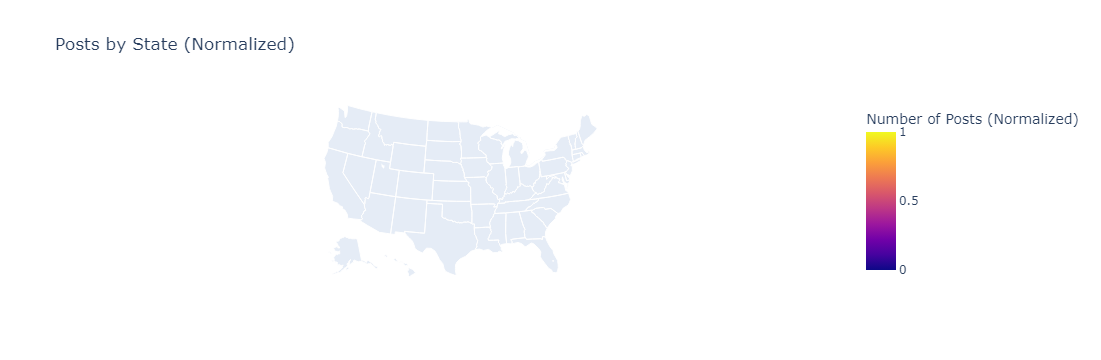

0     1.000000
1     0.749071
2     0.702602
3     0.565056
4     0.437732
5     0.301115
6     0.290892
7     0.281599
8     0.279740
9     0.251859
10    0.210037
11    0.195167
12    0.163569
13    0.160781
14    0.159851
15    0.159851
16    0.157063
17    0.147770
18    0.137546
19    0.135688
20    0.125465
21    0.123606
22    0.102230
23    0.093866
24    0.091078
25    0.089219
26    0.088290
27    0.078996
28    0.075279
29    0.073420
30    0.053903
31    0.049257
32    0.045539
33    0.036245
34    0.035316
35    0.032528
36    0.026022
37    0.024164
38    0.020446
39    0.016729
40    0.015799
41    0.014870
42    0.013011
43    0.011152
44    0.007435
45    0.006506
46    0.006506
47    0.004647
48    0.000929
49    0.000000
Name: Normalized Posts, dtype: float64


In [88]:
import plotly.graph_objects as go
import pandas as pd

# Create a new DataFrame with only the 'Author_Location___State/Province_1' column
state_data = my_data[['Author_Location___State/Province_1']].copy()

# Drop rows with missing values in the 'Author_Location___State/Province_1' column
state_data = state_data.dropna()

# Group by state and count the number of posts in each state
state_counts = state_data['Author_Location___State/Province_1'].value_counts().reset_index()
state_counts.columns = ['State', 'Number of Posts']

# Convert 'Number of Posts' column to numeric
state_counts['Number of Posts'] = pd.to_numeric(state_counts['Number of Posts'])

# Normalize the range of post counts between 0 and 1
min_count = state_counts['Number of Posts'].min()
max_count = state_counts['Number of Posts'].max()
state_counts['Normalized Posts'] = (state_counts['Number of Posts'] - min_count) / (max_count - min_count)

# Create text for hover information
hover_text = state_counts['State'] + '<br>' + 'Number of Posts: ' + state_counts['Number of Posts'].astype(str)

# Create the Choropleth map with the normalized range
fig = go.Figure(data=go.Choropleth(
    locations=state_counts['State'],
    z=state_counts['Normalized Posts'],
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=True,
    text=hover_text,
    marker_line_color='white',
    colorbar_title="Number of Posts (Normalized)"
))

fig.update_layout(
    title_text='Posts by State (Normalized)',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()
print(state_counts['Normalized Posts'])

In [89]:
print(state_counts.columns)

Index(['State', 'Number of Posts', 'Normalized Posts'], dtype='object')


In [90]:
print(hover_text)

0        California<br>Number of Posts: 1087
1              Texas<br>Number of Posts: 817
2           New York<br>Number of Posts: 767
3            Florida<br>Number of Posts: 619
4               Ohio<br>Number of Posts: 482
5       Pennsylvania<br>Number of Posts: 335
6           Illinois<br>Number of Posts: 324
7            Georgia<br>Number of Posts: 314
8         Washington<br>Number of Posts: 312
9           Michigan<br>Number of Posts: 282
10    North Carolina<br>Number of Posts: 237
11     Massachusetts<br>Number of Posts: 221
12          Virginia<br>Number of Posts: 187
13           Arizona<br>Number of Posts: 184
14         Tennessee<br>Number of Posts: 183
15        New Jersey<br>Number of Posts: 183
16          Maryland<br>Number of Posts: 180
17          Colorado<br>Number of Posts: 170
18          Missouri<br>Number of Posts: 159
19            Oregon<br>Number of Posts: 157
20           Alabama<br>Number of Posts: 146
21         Minnesota<br>Number of Posts: 144
22        

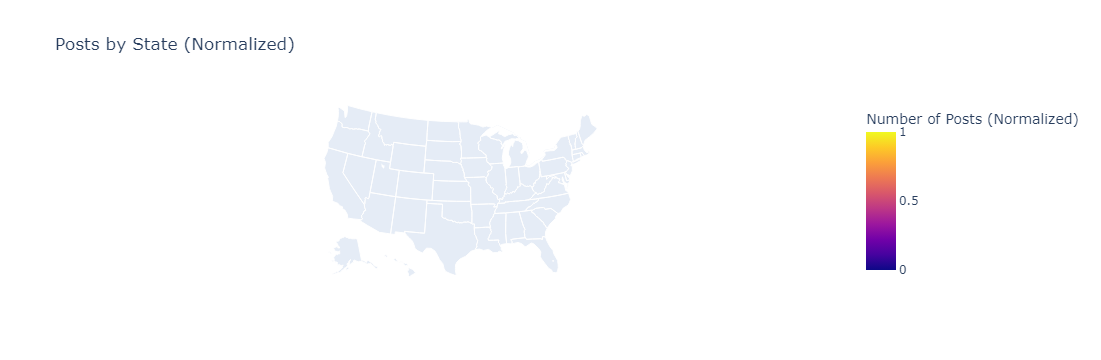

In [92]:
import plotly.graph_objects as go
import pandas as pd

# Create a new DataFrame with only the 'Author_Location___State/Province_1' column
state_data = my_data[['Author_Location___State/Province_1']].copy()

# Drop rows with missing values in the 'Author_Location___State/Province_1' column
state_data = state_data.dropna()

# Group by state and count the number of posts in each state
state_counts = state_data['Author_Location___State/Province_1'].value_counts().reset_index()
state_counts.columns = ['State', 'Number of Posts']

# Convert 'Number of Posts' column to numeric
state_counts['Number of Posts'] = pd.to_numeric(state_counts['Number of Posts'])

# Normalize the range of post counts between 0 and 1
min_count = state_counts['Number of Posts'].min()
max_count = state_counts['Number of Posts'].max()
state_counts['Normalized Posts'] = (state_counts['Number of Posts'] - min_count) / (max_count - min_count)

# Create text for hover information
hover_text = state_counts['State'] + '<br>' + 'Number of Posts: ' + state_counts['Number of Posts'].astype(str)

# Create the Choropleth map with the normalized range
fig = go.Figure(data=go.Choropleth(
    locations=state_counts['State'],  # State abbreviations
    z=state_counts['Normalized Posts'],  # Normalized post counts
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=True,
    text=hover_text,  # Hover text including state names and original post counts
    marker_line_color='white',
    colorbar_title="Number of Posts (Normalized)"
))
fig.update_layout(
    title_text='Posts by State (Normalized)',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()

In [97]:
print(state_data)
print(state_counts)

      Author_Location___State/Province_1
5                               Illinois
6                          Massachusetts
7                                Florida
11                              Delaware
14                            California
...                                  ...
49979                            Arizona
49981                           Maryland
49985                           Maryland
49989                         California
49997                            Florida

[8996 rows x 1 columns]
             State  Number of Posts  Normalized Posts State Abbreviation
0       California             1087          1.000000                 CA
1            Texas              817          0.749071                 TX
2         New York              767          0.702602                 NY
3          Florida              619          0.565056                 FL
4             Ohio              482          0.437732                 OH
5     Pennsylvania              335          

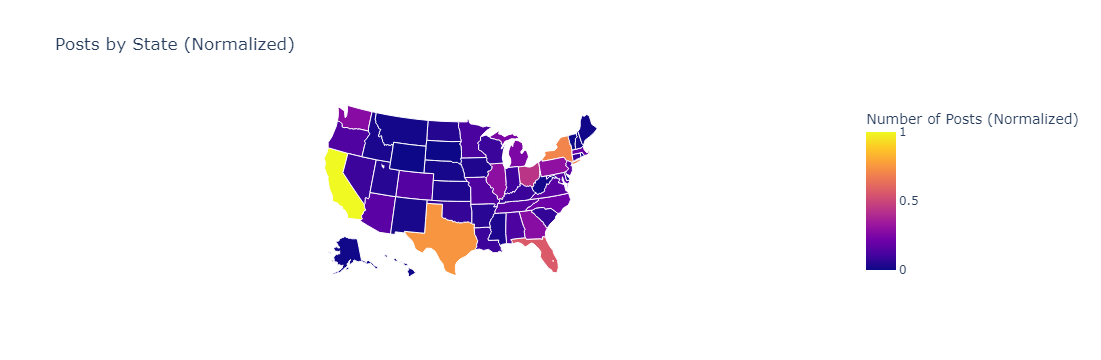

In [96]:
# Create a mapping from state names to abbreviations based on the states available in state_counts
state_abbreviations = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# Replace state names with abbreviations in state_counts['State']
state_counts['State Abbreviation'] = state_counts['State'].map(state_abbreviations)

# Create the Choropleth map with the normalized range
fig = go.Figure(data=go.Choropleth(
    locations=state_counts['State Abbreviation'],  # State abbreviations
    z=state_counts['Normalized Posts'],  # Normalized post counts
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=True,
    text=hover_text,  # Hover text including state names and original post counts
    marker_line_color='white',
    colorbar_title="Number of Posts (Normalized)"
))

fig.update_layout(
    title_text='Posts by State (Normalized)',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()


In [2]:
!pip install stanfordnlp
import pandas as pd
from collections import Counter
from stanfordnlp.server import CoreNLPClient

# Function to analyze sentiment using Stanford CoreNLP
def analyze_sentiment_corenlp(text):
    with CoreNLPClient(annotators=['sentiment'], timeout=30000, memory='4G') as client:
        ann = client.annotate(text)
        sentiment = ann.sentence[0].sentiment
        return sentiment

# Assuming 'outliers_removed_iqr' is your DataFrame and 'Sound_Bite_Text' is the column containing text data

# Apply sentiment analysis to each row in the 'Sound_Bite_Text' column
outliers_removed_iqr['Sentiment'] = outliers_removed_iqr['Sound_Bite_Text'].apply(analyze_sentiment_corenlp)

# Extract positive and negative words based on sentiment scores
positive_words = []
negative_words = []
for _, row in outliers_removed_iqr.iterrows():
    text = row['Sound_Bite_Text']
    sentiment = row['Sentiment']
    words = text.split()
    for word in words:
        # Check if the word contributes significantly to positive or negative sentiment
        if sentiment == 'Positive':
            positive_words.append(word.lower())
        elif sentiment == 'Negative':
            negative_words.append(word.lower())

# Count the occurrences of each word
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Get the top 10 most common positive and negative words
top_10_positive_words = positive_word_counts.most_common(10)
top_10_negative_words = negative_word_counts.most_common(10)

print("Top 10 Positive Words:")
print(top_10_positive_words)
print("\nTop 10 Negative Words:")
print(top_10_negative_words)


  Obtaining dependency information for stanfordnlp from https://files.pythonhosted.org/packages/41/bf/5d2898febb6e993fcccd90484cba3c46353658511a41430012e901824e94/stanfordnlp-0.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf from https://files.pythonhosted.org/packages/cf/20/576e9d592c5d529c571bf6c61801f761d0488bbfb2e8a5c760a784c9ddef/protobuf-5.26.0-cp310-abi3-win_amd64.whl.metadata
  Obtaining dependency information for torch>=1.0.0 from https://files.pythonhosted.org/packages/59/1f/4975d1ab3ed2244053876321ef65bc02935daed67da76c6e7d65900772a3/torch-2.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/f9/de/dc04a3ea60b22624b51c703a84bbe0184abcd1d0b9bc8074b5d6b7ab90bb/typing_extensions-4.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/158.8 kB ? eta -:--:--
   ------------------ --------------------- 71.7/158.8 kB 1.9 MB/s eta 0:0

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

OSError: [WinError 127] The specified procedure could not be found. Error loading "C:\Users\18052\AppData\Roaming\Python\Python39\site-packages\torch\lib\caffe2_detectron_ops.dll" or one of its dependencies.

NameError: name '_C' is not defined